# Aula 03 - RandomForest

Na aula de hoje, abordaremos um outro algoritmo de machine learning muito famoso: o RandomForest. A aula será dividida nos seguintes tópicos:

### - Primeira parte

- Introdução e contextualização
- O conceito de ensemble

### - Segunda parte

- Funcionamento do RandomForest
- Exemplo

### - Terceira parte

- Exercício

# Introdução e contextualização

## Trade-off viés-variância

Um dilema que todo cientista de dados precisa enfrentar durante a construção de um modelo é o que ocorre é o entre o viés é a variância. Há um comportamento natural, que pode ser observado na figura abaixo:  


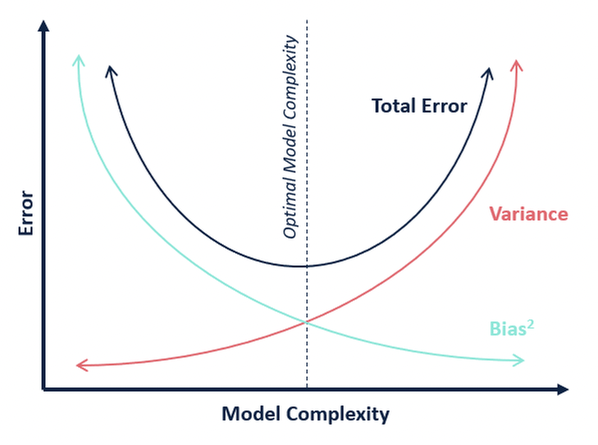  

Podemos interpretar as regiões à direita do ponto ótimo como regiões de **overfitting**, e regiões à esquerda, como **underfitting**.  

A função do cientista é calibrar o modelo através dos hiperparâmetros de maneira que o desempenho seja o melhor possível, ou seja, um ponto ótimo entre viés e variância. Cada modelo possúi característica diferentes, que fazem com que ele possua um viés mais alto ou uma variância mais alta. Como vimos nas aulas passadas, a **árvore de decisão** é um algoritmo com muita variância.  

À medida que a modelagem científica avançou, novas propostas de modelos surgiram (e continuam a surgir) para tentar contornar tendências que os algoritmos possuem naturalmente. Uma abordagem muito popular é a estratégia de **ensemble**.

## Métodos de Ensemble


Um conceito intuitivo e muito popular em Machine Learning são os chamados **métodos de ensemble**, que tem como objetivo **combinar as predições de diversos estimadores** para gerar uma **predição final mais robusta**.

Os métodos de ensemble são ainda divididos em duas classes:

- **Métodos de Bagging**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir variância, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**


- **Métodos de Boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o viés do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Para mais detalhes, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

# O RandomForest

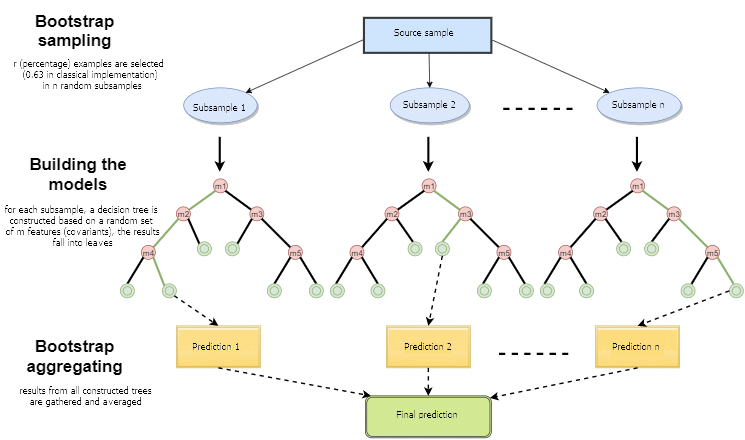

**Treino:**  

1 - Cria um novo dataset a partir da amostragem com reposição do dataset original (**bootstrap**);

2 - Escolhe n variáveis aleatoriamente;

3 - Treina uma árvore de decisão para cada conjunto de dataset e variáveis.

**Inferência:**  

1 - Percorre os dados em cada árvore, gerando uma predição para cada instância;

2 - Toma como predição final a moda do conjunto de predições.

## Testando o conceito

In [66]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

In [67]:
df_cancer_train = pd.read_csv('breast_cancer_train.csv')
df_cancer_test = pd.read_csv('breast_cancer_test.csv')

df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [68]:
df_cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [69]:
df_cancer_train['diagnosis'] = df_cancer_train['diagnosis'].map({'M': 1, 'B': 0})

df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,0,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [70]:
X = df_cancer_train.drop(['id', 'diagnosis'], axis=1)
y = df_cancer_train['diagnosis']

print(X.shape, y.shape)

(455, 30) (455,)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(318, 30) (318,)
(137, 30) (137,)


### Treino

-------

1 - Cria um novo dataset a partir da amostragem com reposição do dataset original;

In [97]:
X_bootstrap = X_train.sample(frac=1.0, replace=True)

print(X_bootstrap.shape)

X_bootstrap.head()

(318, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
411,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,11.94,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800
347,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
96,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
449,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,16.31,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827
411,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,0.06837,...,11.94,19.35,80.78,433.1,0.13320,0.38980,0.33650,0.07966,0.2581,0.10800


In [98]:
y_bootstrap = y_train.loc[X_bootstrap.index]

2 - Escolhe n variáveis aleatoriamente;

In [99]:
import numpy as np

n = int(np.sqrt(len(X_bootstrap.columns)))

n

5

In [100]:
import random

features = X_bootstrap.columns.to_list()

selected_features = random.sample(features, n)

selected_features

['perimeter_se',
 'texture_worst',
 'radius_worst',
 'concave points_se',
 'area_mean']

3 - Treina uma árvore de decisão para cada conjunto de dataset e variáveis.

In [101]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore = DecisionTreeClassifier(max_depth=2)

arvore.fit(X_bootstrap[selected_features], y_bootstrap)

DecisionTreeClassifier(max_depth=2)

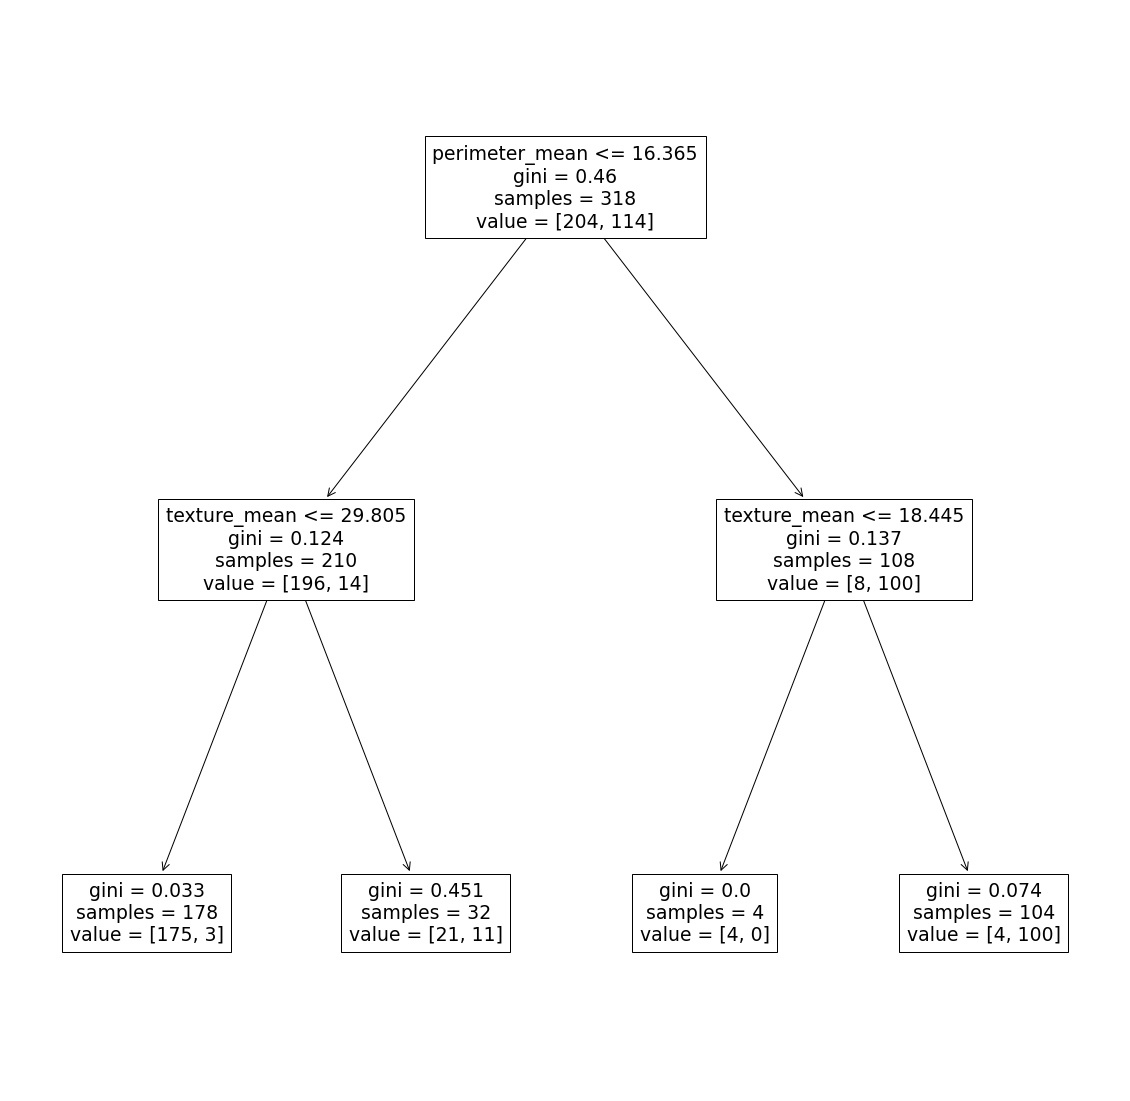

In [102]:
plt.figure(figsize=(20, 20))
plot_tree(arvore, feature_names=X_bootstrap.columns)
plt.show()

In [143]:
NUMERO_DE_ARVORES = 100
MAX_DEPTH = 2
FRAC = 1.0

random_forest_manual = []
feature_names = []

n = int(np.sqrt(len(X_train.columns)))

features = X_train.columns.to_list()

for _ in range(100):
    X_bootstrap = X_train.sample(frac=FRAC, replace=True)
    y_bootstrap = y_train.loc[X_bootstrap.index]
    
    selected_features = random.sample(features, n) # adicionei aleatoriedade
    
    arvore = DecisionTreeClassifier(max_depth=MAX_DEPTH)

    arvore.fit(X_bootstrap[selected_features], y_bootstrap)
    
    random_forest_manual.append(arvore)
    feature_names.append(selected_features)
    

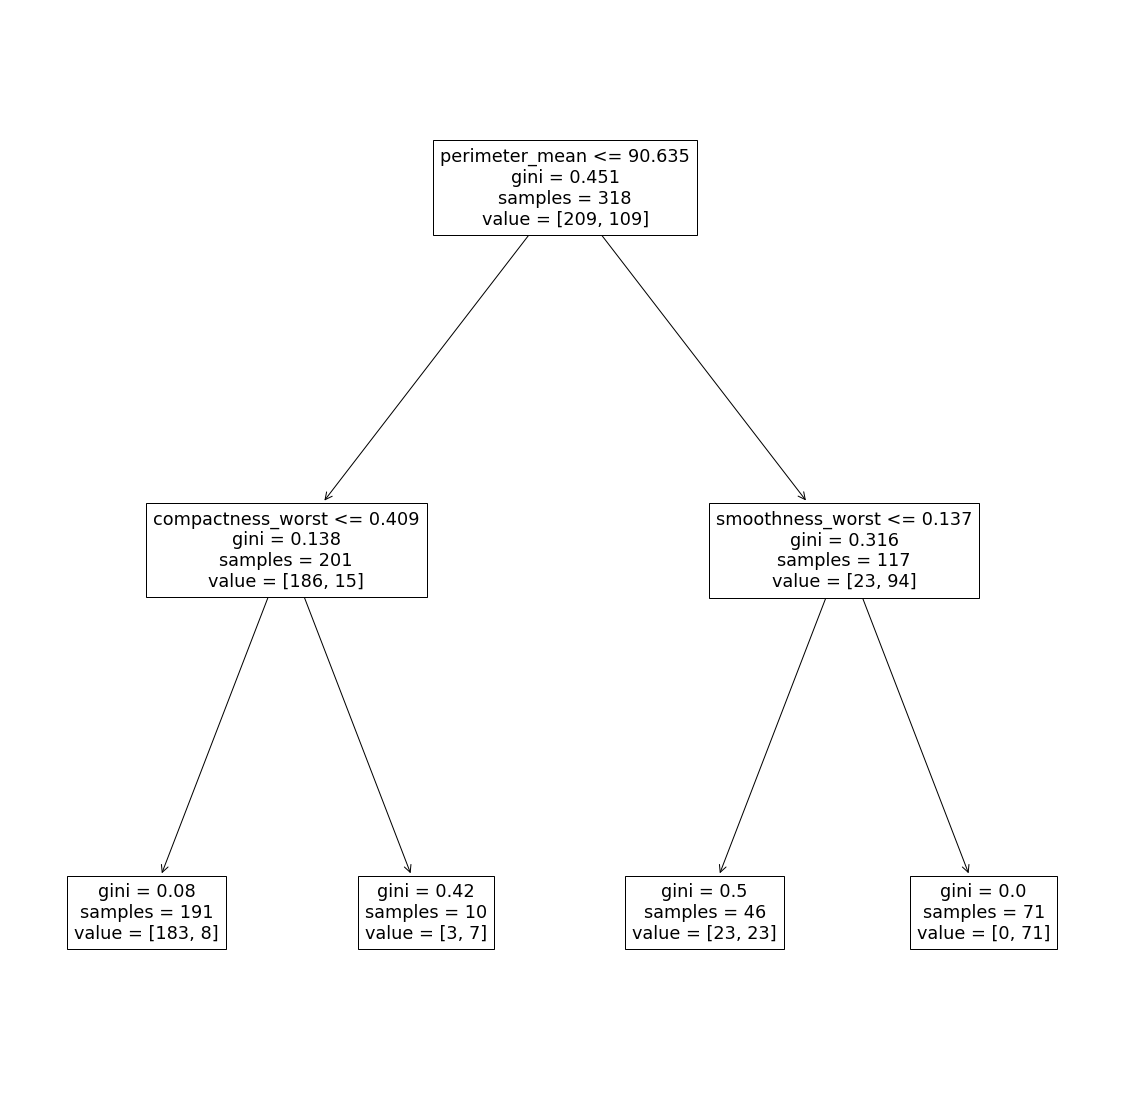

In [144]:
idx = 80

plt.figure(figsize=(20, 20))
plot_tree(random_forest_manual[idx], feature_names=feature_names[idx])
plt.show()

### Inferência

-------

1 - Percorre os dados em cada árvore, gerando uma predição para cada instância;

2 - Toma como predição final a moda do conjunto de predições.

In [145]:
from scipy import stats

def predict(random_forest_manual, feature_names, X):
    predictions = pd.DataFrame()

    for arvore in random_forest_manual:

        idx = random_forest_manual.index(arvore)

        y_predict = arvore.predict(X[feature_names[idx]])

        predictions[f'Arvore {idx}'] = y_predict
        
    y_pred = predictions.apply(lambda row: stats.mode(row)[0][0], axis=1)
    
    return y_pred

In [146]:
predict(random_forest_manual, feature_names, X_valid)

0      1
1      0
2      0
3      0
4      1
      ..
132    0
133    0
134    1
135    0
136    0
Length: 137, dtype: int64

In [147]:
y_train_pred = predict(random_forest_manual, feature_names, X_train)

y_valid_pred = predict(random_forest_manual, feature_names, X_valid)

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.98, Precision: 1.00, Recall: 0.96
Validação:
Acc: 0.96, Precision: 0.96, Recall: 0.92


# Utilizando o RandomForest do sklearn

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
modelo = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=12)

modelo

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=12)

In [169]:
# Treino do modelo

modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=12)

In [170]:
y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(318,) (137,)


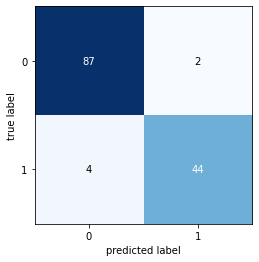

In [171]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_valid, y_valid_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.98, Precision: 0.99, Recall: 0.95
Validação:
Acc: 0.96, Precision: 0.96, Recall: 0.92


In [167]:
modelo.feature_importances_

array([0.03280626, 0.01136841, 0.04935199, 0.0473166 , 0.00428611,
       0.01195249, 0.04346247, 0.11742547, 0.00293046, 0.00398165,
       0.01302931, 0.00396633, 0.01016559, 0.04729106, 0.00438781,
       0.00363626, 0.0035204 , 0.00271768, 0.00266833, 0.00619774,
       0.12680804, 0.01571969, 0.12765061, 0.10440132, 0.01627353,
       0.01776919, 0.03718159, 0.11374591, 0.01075791, 0.0072298 ])

# Pra anotar

- RandomForest é um dos algoritmos de mais sucesso na história da Inteligência Artificial;

- O argoritmo pode ser utilizado tanto para classificação, quanto para regressão;

- Por ser baseado em árvores, exige pouco pré-processamento dos dados para ser utilizado;

- Consegue inferir a importância de cada features no processo de predição;

- Excelente para controlar o overfitting;

- Ótimo modelo para usar como baseline.

-------

# Referências

An Introduction to Statistical Learning, 2013, Gareth James. Daniela Witten. Trevor Hastie. Robert Tibshirani.